In [19]:
HEAD_PATH = '/home/linus/Documents/Projects/Strategy'

In [20]:
DATA_PATH = HEAD_PATH + '/pkl tick/'

In [21]:
import os
os.chdir(DATA_PATH)

In [22]:
os.getcwd()

'/home/linus/Documents/Projects/Strategy/pkl tick'

In [23]:
product_list = ['rb', 'hc', 'i', 'j', 'jm']
product = 'hc'

In [24]:
dire = DATA_PATH + product
dire

'/home/linus/Documents/Projects/Strategy/pkl tick/hc'

In [143]:
CORE_NUM = os.cpu_count()
CORE_NUM

16

In [25]:
all_dates = list(map(lambda x: x, os.listdir(DATA_PATH + product)))
len(all_dates)

915

In [28]:
all_dates[-6 :]

['20170110.pkl',
 '20190325.pkl',
 '20160721.pkl',
 '20170509.pkl',
 '20180607.pkl',
 '20180725.pkl']

In [29]:
date = '20180607' # specify a date

In [30]:
# loading data set
import pandas as pd
import numpy as np
import math
import _pickle as cPickle
import gzip

with gzip.open(dire + '/' + date + '.pkl', 'rb', compresslevel=1) as file_object:
    raw_data = file_object.read()
data = cPickle.loads(raw_data)

In [31]:
data.head()

,contract,date.time,price,cum.open.int,open.int,turnover,qty,bid,ask,bid.qty,...,wpr,wpr.ret,next.ask,next.bid,min.1024,max.1024,min.2048,max.2048,min.4096,max.4096
0,hc1810,2018-06-06 20:59:00.500,3920.0,689296,906,49862400.0,1272,3919.0,3920.0,30,...,3919.340909,1.340909,3923.0,3922.0,3919.340909,3919.340909,3919.340909,3919.340909,3919.340909,3919.340909
1,hc1810,2018-06-06 21:00:00.500,3923.0,690052,756,31369400.0,800,3922.0,3923.0,210,...,3922.561497,3.220588,3925.0,3924.0,3919.340909,3922.561497,3919.340909,3922.561497,3919.340909,3922.561497
2,hc1810,2018-06-06 21:00:01.000,3924.0,690638,586,40174620.0,1024,3924.0,3925.0,41,...,3924.286713,1.725216,3926.0,3925.0,3919.340909,3924.286713,3919.340909,3924.286713,3919.340909,3924.286713
3,hc1810,2018-06-06 21:00:01.500,3925.0,690868,230,19860460.0,506,3925.0,3926.0,41,...,3925.253086,0.966373,3926.0,3925.0,3919.340909,3925.253086,3919.340909,3925.253086,3919.340909,3925.253086
4,hc1810,2018-06-06 21:00:02.000,3926.0,690940,72,8557380.0,218,3925.0,3926.0,12,...,3925.101695,-0.151392,3925.0,3924.0,3919.340909,3925.253086,3919.340909,3925.253086,3919.340909,3925.253086


In [32]:
data.columns

Index(['contract', 'date.time', 'price', 'cum.open.int', 'open.int',
       'turnover', 'qty', 'bid', 'ask', 'bid.qty', 'ask.qty', 'date', 'time',
       'milli', 'good', 'mid.price', 'buy.trade', 'buy2.trade', 'sell.trade',
       'sell2.trade', 'log.price', 'ret', 'wpr', 'wpr.ret', 'next.ask',
       'next.bid', 'min.1024', 'max.1024', 'min.2048', 'max.2048', 'min.4096',
       'max.4096'],
      dtype='object')

In [33]:
data.columns
# contract: contract name (product + expiration date)
# date.time: date and time
# price: newest price of data
# cum.open.int: cumulative open interest
# open.int: newest open interest increment
# turnover: newest turnover increment
# qty: newest trading volume
# bid: bid price
# ask: ask price
# bid.qty: bid size
# ask.qty: ask size
# date: actual date
# time: actual time
# milli: actual milli second (shanghai: 0, cffex: 500, dalian: random, zhengzhou: 0)
# mid.price: middle price of bid and ask
# buy.trade: active buy volume at level 1 (approximation, not supply by the exchange)
# buy2.trade: active buy volume at other levels (approximation, not supply by the exchange)
# sell.trade: active sell volume at level 1 (approximation, not supply by the exchange)
# sell2.trade: active sell volume at other levels (approximation, not supply by the exchange)
# log.price: log wpr (volume weighted price)
# ret: log return of last tick
# wpr: volume weighted price
# wpr.ret: price change of wpr
# high: highest price of last ask, last price, and this ask 
# low: lowest price of last bid, last price, and this bid 
# next.bid: estimated active sell price, used for backtesting (approximation, not supply by the exchange)
# next.ask: estimated active buy price, used for backtesting (approximation, not supply by the exchange)
# min.1024: rolling minimum of wpr over 1024 ticks
# max.1024: rolling maximum of wpr over 1024 ticks
# min.2048: rolling minimum of wpr over 2048 ticks
# max.2048: rolling maximum of wpr over 2048 ticks
# min.4096: rolling minimum of wpr over 4096 ticks
# max.4096: rolling maximum of wpr over 4096 ticks

Index(['contract', 'date.time', 'price', 'cum.open.int', 'open.int',
       'turnover', 'qty', 'bid', 'ask', 'bid.qty', 'ask.qty', 'date', 'time',
       'milli', 'good', 'mid.price', 'buy.trade', 'buy2.trade', 'sell.trade',
       'sell2.trade', 'log.price', 'ret', 'wpr', 'wpr.ret', 'next.ask',
       'next.bid', 'min.1024', 'max.1024', 'min.2048', 'max.2048', 'min.4096',
       'max.4096'],
      dtype='object')

In [35]:
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

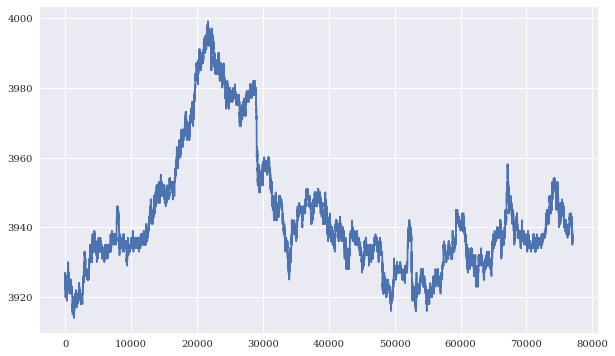

In [36]:
plt.figure(1, figsize=(10, 6))
plt.plot(data['price'].values);

In [70]:
range_ = (data['time'] >= '09:00:00') & (data['time'] <= '15:00:02')

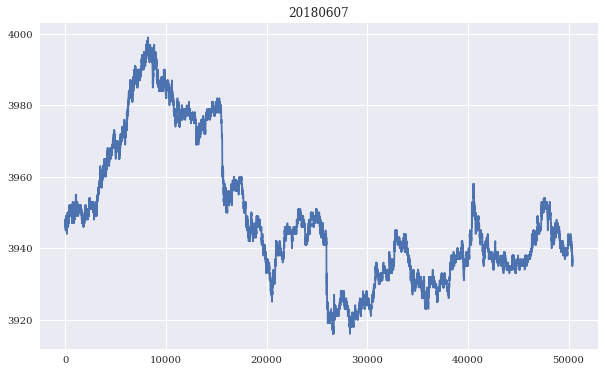

In [71]:
plt.figure(1, figsize=(10, 6))
plt.title(date)
plt.plot(data['price'][range_].values);

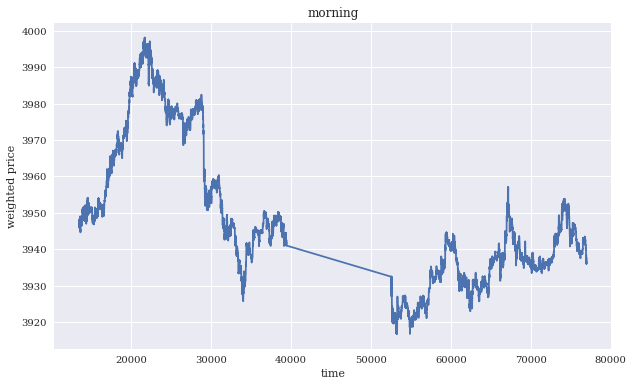

In [75]:
plt.figure(1, figsize=(10, 6))
plt.title('morning')
plt.xlabel('time')
plt.ylabel('weighted price')
plt.plot(data.index[range_].values, data['wpr'][range_].values); # break between 11:30 ~ 13:30

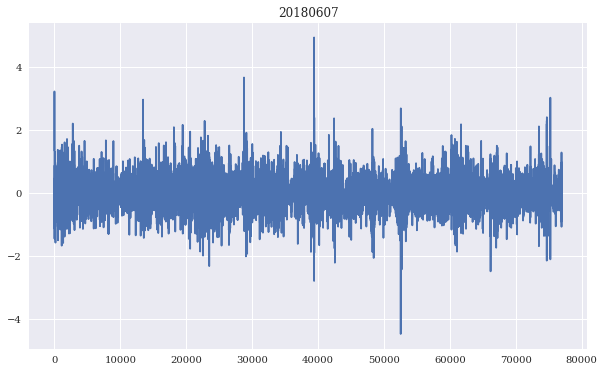

In [82]:
# price change
plt.figure(1, figsize=(10, 6))
plt.title(date)
data['wpr.ret'].values[0] = temp
plt.plot(data['wpr.ret'].values);

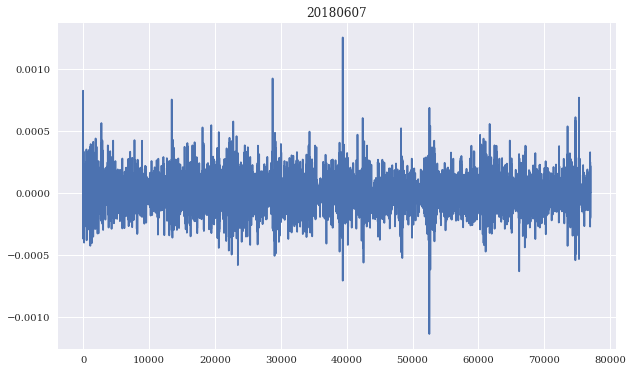

In [88]:
# log return
plt.figure(1, figsize=(10, 6))
plt.title(date)
plt.plot(data['ret'].values);

In [89]:
# count the number of rising ticks
sum(data['ret'] > 0)

34022

In [90]:
# count the number of falling ticks
sum(data['ret'] < 0)

34066

In [91]:
# count the numver of total ticks
len(data)

76986

In [93]:
# formula to calculate wpr
wpr = (data['bid'] * data['ask.qty'] + data['ask'] * data['bid.qty']) / (data['bid.qty'] + data['ask.qty'])

In [95]:
# upper limit or lower limit
limit = (data['ask.qty'] == 0) | (data['bid.qty'] == 0)

In [96]:
# when one of bid qty and ask qty is zero, use newest price as wpr
wpr[limit] = data['price'][limit]

In [97]:
wpr.head()

0    3919.340909
1    3922.561497
2    3924.286713
3    3925.253086
4    3925.101695
dtype: float64

In [100]:
data['wpr'].head()

0    3919.340909
1    3922.561497
2    3924.286713
3    3925.253086
4    3925.101695
Name: wpr, dtype: float64

In [101]:
sum(abs(wpr - data['wpr']) > 0.0000001)

0

In [102]:
data['good']

0        False
1        False
2        False
3        False
4        False
         ...  
76981    False
76982    False
76983    False
76984    False
76985    False
Name: good, Length: 76986, dtype: bool

In [106]:
# stationary test for return series
# load related package
import statsmodels.tsa.stattools as ts

In [110]:
# ADF test
result = ts.adfuller(data['ret'][data['good']], maxlag = int(pow(len(data['ret'][data['good']]) - 1, (1/3))),
                    regression='ct', autolag=None)
result 
# (adf stats, p-value, usedlags, nobs, critical values)
# -32.05 < -3.9, reject the null hypothesis -> stationary

(-32.05694568376511,
 0.0,
 33,
 39060,
 {'1%': -3.9590017928287584,
  '5%': -3.410602407357044,
  '10%': -3.127116198169511})

In [112]:
# KPSS test
result = ts.kpss(data['ret'][data['good']], regression='c', 
                 nlags=int(3 * math.sqrt(len(data['ret'][data['good']])) / 13))
result 
# (kpss stats, p-value, lags, critical values)
# for KPSS test, small value means the level of stationary, large value means trend
# stationary

/home/linus/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.25129471676804194,
 0.1,
 45,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [117]:
# get the price movements of 120 ticks ~= 1 minute

ret_120 = (data['ret'].rolling(120).sum()).dropna().reset_index(drop=True)
ret_120

0        0.001550
1        0.001220
2        0.000401
3       -0.000034
4       -0.000292
           ...   
76862   -0.001435
76863   -0.001641
76864   -0.001646
76865   -0.001614
76866   -0.001556
Name: ret, Length: 76867, dtype: float64

In [120]:
# check the first element whether it is correct
sum(data['ret'][0: 120])

0.0015502397808582226

In [121]:
ret_120.iloc[0]

0.0015502397808582217

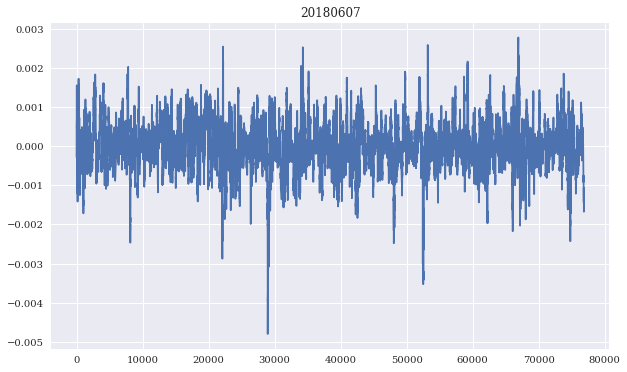

In [122]:
# plot the price movements of 120 ticks
plt.figure(1, figsize=(10, 6))
plt.title(date)
plt.plot(ret_120.values);

In [123]:
len(ret_120)

76867

In [124]:
len(data)

76986

In [126]:
range_120 = ((np.mod(np.arange(0, len(data)), 120) == 0) & data['good'])[119:]

In [131]:
range_120[range_120 == True]

13560    True
13680    True
13800    True
13920    True
14040    True
         ... 
51960    True
52080    True
52200    True
52320    True
52440    True
Name: good, Length: 325, dtype: bool

In [132]:
len(range_120)

76867

In [133]:
ret_120.iloc[np.where(range_120)]

13441    0.000476
13561    0.000473
13681   -0.000175
13801    0.000533
13921    0.000024
           ...   
51841    0.000836
51961    0.001268
52081    0.000834
52201   -0.000604
52321    0.000234
Name: ret, Length: 325, dtype: float64

In [134]:
# test whether ret_120 is stationary

# ADF test
result = ts.adfuller(ret_120.iloc[np.where(range_120)],
                    maxlag=int(pow(len(ret_120.iloc[np.where(range_120)]) - 1, (1/3))),
                    regression='ct',
                    autolag=None)
result # stationary

(-6.779059946979469,
 4.4390012922021224e-08,
 6,
 318,
 {'1%': -3.987524159952822,
  '5%': -3.424387055946507,
  '10%': -3.1352203272947916})

In [137]:
# KPSS test
result = ts.kpss(ret_120.iloc[np.where(range_120)], regression='c',
                             nlags=int(3 * math.sqrt(len(ret_120.iloc[np.where(range_120)])) / 13))
result # stationary

/home/linus/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.23074561696385323,
 0.1,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [138]:
# check longer period
ret_2000 = (data['ret'].rolling(2000).sum()).dropna().reset_index(drop=True)

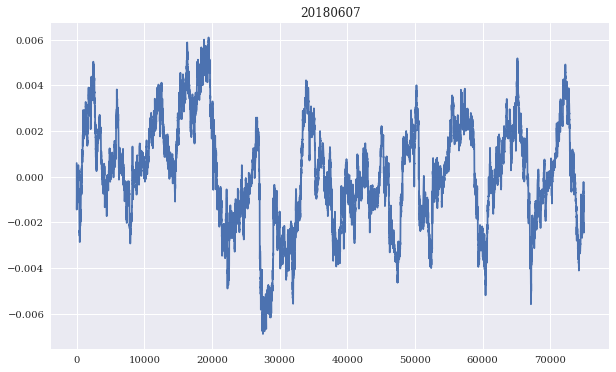

In [139]:
plt.figure(1, figsize=(10, 6))
plt.title(date)
plt.plot(ret_2000.values);

In [145]:
sum((np.mod(np.arange(1, len(data)+1), 2000) == 0) & (data['good'])) # too few points

20

In [146]:
def load(path):
    with gzip.open(path, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    return cPickle.loads(raw_data)

In [156]:
# we can check for more days
def get_sample_ret(date, period):
    data = load(DATA_PATH + product + '/' + date)
    ret = (data['ret'].rolling(period).sum()).dropna().reset_index(drop=True)
    range = ((np.mod(np.arange(0, len(data)), period) == 0) & data['good'])[(period-1):]
    return ret.iloc[np.where(range)]

In [157]:
import functools
import dask
from dask import compute, delayed

In [158]:
def parLapply(CORE_NUM, iterable, func, *args, **kwargs):
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(func, *args, **kwargs)
        result = compute([delayed(f_par)(item) for item in iterable])[0]
    return result

In [159]:
%%time
result = parLapply(CORE_NUM, all_dates, get_sample_ret, period=4096)

CPU times: user 1.77 s, sys: 267 ms, total: 2.04 s
Wall time: 16.3 s


In [160]:
from itertools import chain

In [161]:
ret_long = list(chain.from_iterable(result))

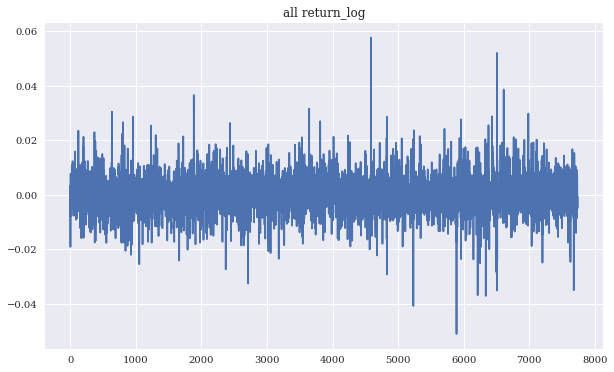

In [162]:
plt.figure(1, figsize=(10, 6))
plt.title('all return_log')
plt.plot(ret_long);

In [163]:
# ADF test
result = ts.adfuller(ret_long, maxlag=int(pow(len(ret_long)-1, (1/3))), regression='ct', autolag=None)
result # reject the null hypothesis, stationary

(-19.788937656380323,
 0.0,
 19,
 7720,
 {'1%': -3.959943158631399,
  '5%': -3.4110588563766386,
  '10%': -3.127384988185907})

In [171]:
# KPSS test
result = ts.kpss(ret_long, regression='c', nlags=int(3 * math.sqrt(len(ret_long)) / 13))
result # fail to reject the null hypothesis, stationary

/home/linus/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.08088015266448542,
 0.1,
 20,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [172]:
# it's stationary for 4096 ticks

In [175]:
# denosing
vanish_ret_long = np.array(ret_long)
vanish_ret_long[np.array(ret_long) > 0.005] = 0
vanish_ret_long[np.array(ret_long) < -0.005] = 0
result = ts.kpss(vanish_ret_long, regression='c', nlags=int(3* math.sqrt(len(ret_long)) / 13))
result # fail to reject the null hypothesis, stationary after denosing

/home/linus/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.11575808281071627,
 0.1,
 20,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [176]:
threshold = 0.001
len(ret_long)

7740

In [177]:
# count the number of ticks above the positive threshold
sum(np.array(ret_long) > threshold)

3242

In [178]:
# count the number of ticks below the negative threshold
sum(np.array(ret_long) < -threshold)

2998

In [179]:
from collections import OrderedDict

In [220]:
# strategy : when ret > threshold, signal = 1; when ret < -threshold, signal = -1; otherwise signal = 0.
# position = signal
def get_daily_pnl_fast(date, product='hc', period=4096, threshold=0.001, tranct=1.1e-4, noise=0):
    with gzip.open(dire + '/' + date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    ori_data = cPickle.loads(raw_data)
    data = ori_data[ori_data['good']]
    n_bar = len(data)
    unit = np.std(data['ret'])
    np.random.seed(10)
    ret_long = (data['ret'].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_long = ret_long.append(pd.Series([0]*(len(data)-len(ret_long)))).reset_index(drop=True)
    signal = pd.Series([0] * n_bar)
    signal[(ret_long > threshold) & (np.array(data['next.ask']) > 0)] = 1
    signal[(ret_long < -threshold) & (np.array(data['next.bid']) > 0)] = -1
    position = signal
    position[0] = 0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = np.zeros(n_bar)
    change_buy = ((change_pos > 0) & (np.array(data['next.ask']) > 0))
    change_sell = ((change_pos < 0) & (np.array(data['next.bid']) > 0))
    change_base[change_buy] = (np.array(data['next.ask'])[change_buy]) * (1 + tranct)
    change_base[change_sell] = (np.array(data['next.bid'])[change_sell]) * (1 - tranct)
    final_pnl = -sum(change_base * change_pos)
    turnover = sum(change_base * abs(change_pos))
    num = sum((position != 0) & (change_pos != 0))
    hld_period = sum(position != 0)
    result = OrderedDict([('date', date), ('final_pnl', final_pnl), ('turnover', turnover), ('num', num), 
                         ('hld_period', hld_period)])
    return result

In [221]:
get_daily_pnl_fast(all_dates[1], product='hc', period=4096, threshold=0.001, tranct=1.1e-4)

OrderedDict([('date', '20180815.pkl'),
             ('final_pnl', -272.4171000000588),
             ('turnover', 1385610.0131999997),
             ('num', 164),
             ('hld_period', 21992)])

In [222]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product='hc', 
                              period=4096, threshold=0.001, tranct=1.1e-4, noise=0)
    result = compute([delayed(f_par)(date) for date in all_dates])[0]


CPU times: user 3.01 s, sys: 389 ms, total: 3.4 s
Wall time: 21 s


In [223]:
result

[OrderedDict([('date', '20160315.pkl'),
              ('final_pnl', -229.08119000004672),
              ('turnover', 909829.0141899992),
              ('num', 210),
              ('hld_period', 24292)]),
 OrderedDict([('date', '20180815.pkl'),
              ('final_pnl', -272.4171000000588),
              ('turnover', 1385610.0131999997),
              ('num', 164),
              ('hld_period', 21992)]),
 OrderedDict([('date', '20180524.pkl'),
              ('final_pnl', -218.25993000007566),
              ('turnover', 1302363.0082499988),
              ('num', 173),
              ('hld_period', 25980)]),
 OrderedDict([('date', '20180514.pkl'),
              ('final_pnl', -296.20928000009644),
              ('turnover', 1456448.01496),
              ('num', 193),
              ('hld_period', 22539)]),
 OrderedDict([('date', '20171106.pkl'),
              ('final_pnl', -431.13109000011764),
              ('turnover', 2273919.0199099975),
              ('num', 287),
              ('hld_p

In [244]:
def get_performance(result, spread=1):
    aa = pd.DataFrame(result)
    aa.set_index('date', inplace=True)
    col_names = aa.columns
    row_names = aa.index
    stat = aa.values
    stat = np.array(np.rec.fromrecords(aa.values))
    np_names = aa.dtypes.index.tolist()
    stat.dtype.names = tuple([name for name in np_names])
    stat = pd.DataFrame(stat)
    pnl = stat['final_pnl'].cumsum()
    date_format = [pd.to_datetime(d) for d in date_str]
    date_format.sort()
    plt.figure(1, figsize=(10, 6))
    plt.title('')
    plt.xlabel('date')
    plt.ylabel('pnl')
    plt.plot(date_format, pnl)
    n_days = len(stat)
    num = stat['num'].mean()
    if num == 0:
        return;
    if (stat['final_pnl'].std() == 0):
        sharpe = 0
    else:
        sharpe = stat['final_pnl'].mean() / stat['final_pnl'].std() * math.sqrt(250)
    drawdown = max(pnl.cummax() - pnl) / pnl.iloc[-1]
    mar = 1 / drawdown
    win_ratio = sum(stat['final_pnl'] > 0) / n_days
    
    avg_pnl = sum(stat['final_pnl']) / sum(stat['num']) / spread
    hld_period = sum(stat['hld_period']) / sum(stat['num'])
    return OrderedDict([('sharpe', sharpe), ('drawdown', drawdown), ('mar', mar), 
                        ('win_ratio', win_ratio), ('num', num), ('avg_pnl', avg_pnl), ('hld_period', hld_period)])

,sharpe,drawdown,mar,win_ratio,num,avg_pnl,hld_period
0,-4.248958,-0.999153,-1.000847,0.055738,179.068852,-1.651433,137.562949


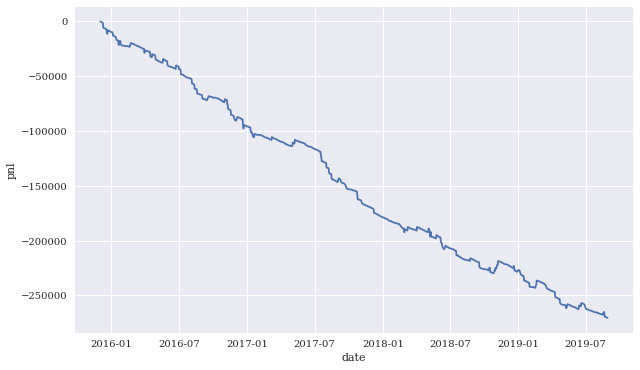

In [245]:
pd.DataFrame(get_performance(result, 1), index=[0]) # too bad

In [246]:
# increase the threshold
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product='hc', 
                              period=4096, threshold=0.01, tranct=1.1e-4, noise=0)
    result_2 = compute([delayed(f_par)(date) for date in all_dates])[0]

,sharpe,drawdown,mar,win_ratio,num,avg_pnl,hld_period
0,-1.834228,-1.000178,-0.999822,0.076503,29.891803,-1.598797,74.751673


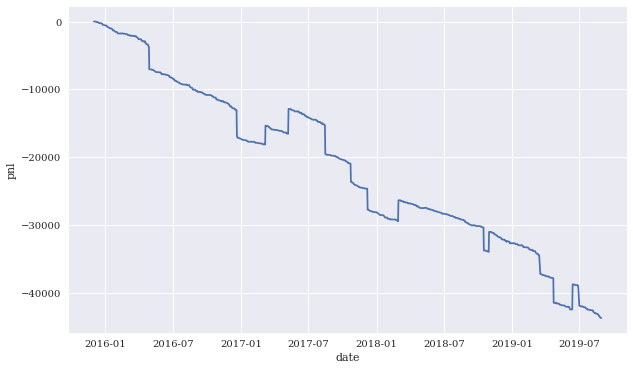

In [247]:
pd.DataFrame(get_performance(result_2), index=[0])

In [253]:
# increase the threshold ++
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product='hc', 
                              period=4096, threshold=0.02, tranct=1.1e-4, noise=0)
    result_3 = compute([delayed(f_par)(date) for date in all_dates])[0]


,sharpe,drawdown,mar,win_ratio,num,avg_pnl,hld_period
0,-0.045935,-9.528106,-0.104953,0.02623,3.533333,-0.150093,57.985153


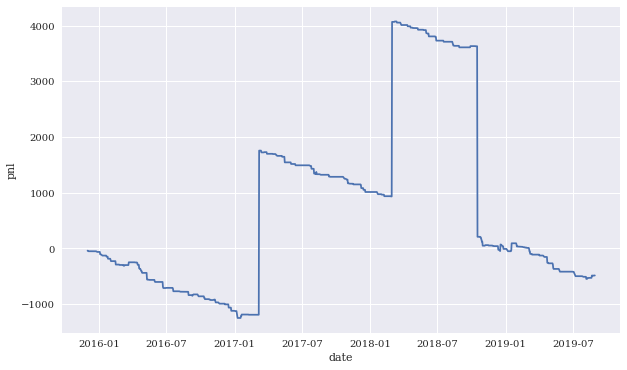

In [254]:
pd.DataFrame(get_performance(result_3), index=[0])

In [255]:
# strategy2 : when ret > threshold, signal = 1; when ret < -threshold, signal = -1; otherwise signal = 0.
# position = signal when signal != 0
def get_daily_pnl(date, product='hc', period=4096, threshold=0.001, tranct=1.1e-4, noise=0):
    with gzip.open(dire + '/' + date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    ori_data = cPickle.loads(raw_data)
    data = ori_data[ori_data['good']].reset_index(drop=True)
    n_bar = len(data)
    unit = np.std(data['ret'])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ret_long = (data['ret'].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_long = ret_long.append(pd.Series([0]*(len(data)-len(ret_long)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[(ret_long > threshold)] = 1
    signal[(ret_long < -threshold)] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal == 1) & (data['next.ask'] > 0) & (data['next.bid'] > 0)] = 1
    position_pos[(ret_long < -threshold) & (data['next.bid'] > 0)] = 0
    position_pos.ffill(inplace=True)
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal == -1) & (data['next.ask'] > 0) & (data['next.bid'] > 0)] = -1
    position_neg[(ret_long > threshold) & (data['next.ask'] > 0)] = 0
    position_neg.ffill(inplace=True)
    position = position_pos + position_neg
    position[0] = 0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos > 0
    change_sell = change_pos < 0
    change_base[change_buy] = (np.array(data['next.ask'])[change_buy]) * (1 + tranct)
    change_base[change_sell] = (np.array(data['next.bid'])[change_sell]) * (1 - tranct)
    final_pnl = -sum(change_base * change_pos)
    turnover = sum(change_base * abs(change_pos))
    num = sum((position != 0) & (change_pos != 0))
    hld_period = sum(position != 0)
    result = OrderedDict([('date', date), ('final_pnl', final_pnl), ('turnover', turnover), ('num', num), 
                         ('hld_period', hld_period)])
    return result

In [256]:
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product='hc', 
                              period=4096, threshold=0.001, tranct=1.1e-4, noise=0)
    result_4 = compute([delayed(f_par)(date) for date in all_dates])[0]

,sharpe,drawdown,mar,win_ratio,num,avg_pnl,hld_period
0,27.021101,0.000088,11324.060368,0.991257,15.900546,6.226715,2198.78081


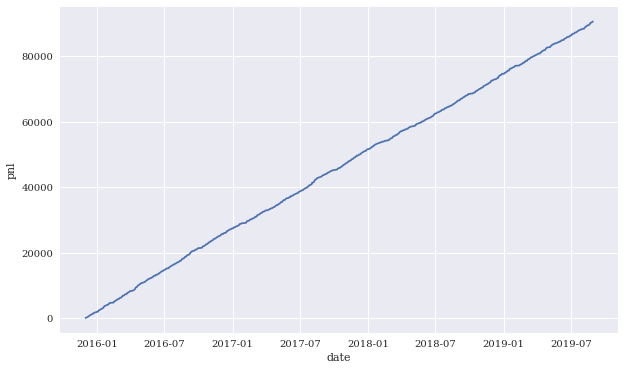

In [257]:
pd.DataFrame(get_performance(result_4), index=[0]) # the result is unrealistic because it uses future data

,sharpe,drawdown,mar,win_ratio,num,avg_pnl,hld_period
0,8.126472,0.036644,27.289391,0.931148,27.230601,2.637376,1282.941925


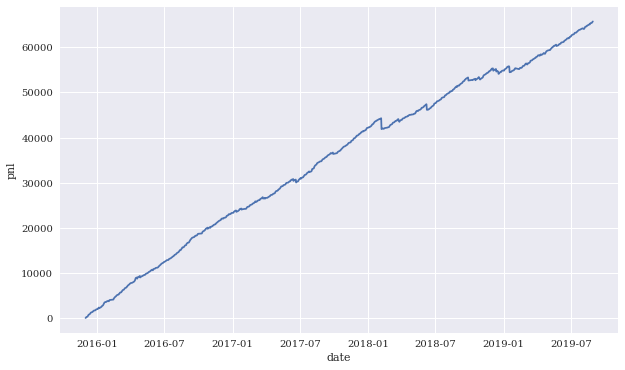

In [259]:
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product='hc', 
                              period=4096, threshold=0.002, tranct=1.1e-4, noise=5)
    result_5 = compute([delayed(f_par)(date) for date in all_dates])[0]
    
pd.DataFrame(get_performance(result_5), index=[0])